# An Introduction to Probability

In 1814, Pierre-Simon Laplace [wrote](https://en.wikipedia.org/wiki/Classical_definition_of_probability):

>*Probability theory is nothing but common sense reduced to calculation. ... [Probability] is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible ... when nothing leads us to expect that any one of these cases should occur more than any other.*

<center> <image src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG/180px-AduC_197_Laplace_%28P.S.%2C_marquis_de%2C_1749-1827%29.JPG"></center>
<center><a href="https://en.wikipedia.org/wiki/Pierre-Simon_Laplace">Pierre-Simon Laplace</a><br>1814</center>


Laplace nailed it. To untangle a probability problem, all you have to do is define exactly what the cases are, and careful count the favorable and total cases. Let's be clear on our vocabulary words:


- **[Trial](https://en.wikipedia.org/wiki/Experiment_(probability_theory%29):**
  A single occurrence with an outcome that is uncertain until we observe it. 
  <br>*For example, rolling a single die.*
- **[Outcome](https://en.wikipedia.org/wiki/Outcome_(probability%29):**
  A possible result of a trial; one particular state of the world. What Laplace calls a **case.**
  <br>*For example:* `4`.
- **[Sample Space](https://en.wikipedia.org/wiki/Sample_space):**
  The set of all possible outcomes for the trial. 
  <br>*For example,* `{1, 2, 3, 4, 5, 6}`.
- **[Event](https://en.wikipedia.org/wiki/Event_(probability_theory%29):**
  A subset of the sample space, a set of outcomes that together have some property we are interested in.
  <br>*For example, the event "even die roll" is the set of outcomes* `{2, 4, 6}`. 
- **[Probability](https://en.wikipedia.org/wiki/Probability_theory):**
  As Laplace said, the probability of an event with respect to a sample space is the "number of favorable cases" (outcomes from the sample space that are in the event) divided by the "number of all the cases" in the sample space (assuming "nothing leads us to expect that any one of these cases should occur more than any other"). Since this is a proper fraction, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event).
<br>*For example, the probability of an even die roll is 3/6 = 1/2.*

## 1. `P` is for Probability

The code below implements Laplace's quote directly: *Probability is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible.*

In [1]:
from fractions import Fraction

def P(event, space): 
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)), 
                    cases(space))

favorable = set.intersection # Outcomes that are in the event and in the sample space
cases     = len              # The number of cases is the length, or size, of a set

In [2]:
set_a = {1,2,3}
set_b = {3,4,5}

In [3]:
set.intersection(set_a, set_b)

{3}

What's the probability of rolling an even number with a single six-sided fair die? Mathematicians traditionally use a single capital letter to denote a sample space; I'll use `D` for the die:

{2,4,6}/{1,2,3,4,5,6}
3/6 = 0.5 = 1/2

In [4]:
D     = {1, 2, 3, 4, 5, 6} # a sample space
even  = {   2,    4,    6} # an event

P(even, D)

Fraction(1, 2)

Good to confirm what we already knew. We can explore some other events:

In [5]:
prime = {2, 3, 5, 7, 11, 13}
odd   = {1, 3, 5, 7, 9, 11, 13} # Impar

In [6]:
set.intersection({1, 3, 5, 7, 9, 11, 13}, {1,2,3,4,5,6})

{1, 3, 5}

In [7]:
P(odd, D) # {1,3,5}/

Fraction(1, 2)

In [8]:
P((even | prime), D) # The probability of an even or prime die roll {2,4,6}{2,3,5} : {2,3,4,5,6}/{1,2,3,4,5,6}

Fraction(5, 6)

In [9]:
P((odd & prime), D) # The probability of an odd prime die roll {1,3,5}{2,3,5} : {3,5}/{1,2,3,4,5,6}

Fraction(1, 3)

### 2.1 An approach using Numpy

You can use numpy to create an discrete sample space and the foreseable events to calculate probabilities. The following steps are required:
- Create your sample space
- Create your trials. By now the more, the better
- Create your event. You can use a numpy mask which evaluates to booleans
- Divide the count of the event by the count of the trials


In [13]:
import numpy as np 
die_space = np.arange(1,7) # Arange will take the interval betweeen (a, b-1)
die_space

array([1, 2, 3, 4, 5, 6])

In [19]:
np.random.seed(27) # Make your findings reproducible
trial = np.random.choice(die_space, 100000)
print(trial)
len(trial)

[4 1 1 ... 2 4 3]


100000

Event = Give me all the even numbers 

In [21]:
mask = trial % 2 == 0
mask

array([ True, False, False, ...,  True,  True, False])

In [22]:
len(trial[trial % 2 == 0]) / len(trial) # [trial % 2 == 0] se utiliza como filtro

0.49799

In [23]:
len(trial[np.isin(trial,[2,4,6])])/len(trial)

0.49799

In [24]:
len(trial[np.isin(trial,[2,4])])/len(trial)

0.33115

### 2.2 The Monte Carlo simulations

You can use numpy to create an discrete sample space and the foreseable events to calculate probabilities. The following steps are required:
- Create your sample space
- Create your trials. By now the more, the better
- Create your event. You can use a numpy mask which evaluates to booleans
- Divide the count of the event by the count of the trials

#### 2.2.1 Picking balls from an urn

Pick a bead at random from a bag that contains three blue beads and two red ones. Using Numpy wil permit us to mimic the process of picking at random.

In [26]:
urn_space = np.array([0,0,1,1,1]) # Encoding 1=Blue, 0=Red
# Simulate one pick at random
np.random.choice(urn_space, 1) # Proportion of blue = 3/5 (0.6), proportion of red= 2/5 (0.4)

array([0])

This line of code produces one random outcome. We want to repeat this experiment an infinite number of times, but it is impossible to repeat forever. Instead, we repeat the experiment a large enough number of times to make the results practically equivalent to repeating forever. This is an example of a Monte Carlo simulation.


In [27]:
np.random.seed(27)
trial = np.random.choice(urn_space, 100000)

In [29]:
event = np.isin(trial,[1])
print(event)
len(trial[event])/len(trial)

[ True False False ...  True False False]


0.6016

In [139]:
trial.mean() # Just in case of only two possibilities, you can calculate the probs for the encoded '1'

0.6016

#### 2.2.2 Results from throwing a dice



What's the probability of rolling an even number with a single six-sided fair die?

In [30]:
import numpy as np
die_space = np.arange(1,7) # Arange will take the interval betweeen (a, b-1)
die_space

array([1, 2, 3, 4, 5, 6])

In [4]:
np.random.seed(27) # Make your findings reproducible
trial = np.random.choice(die_space, 100)
trial

array([4, 1, 1, 1, 1, 6, 1, 2, 6, 2, 3, 3, 2, 3, 2, 5, 4, 4, 3, 1, 6, 4,
       5, 6, 4, 3, 5, 6, 3, 4, 1, 6, 2, 3, 1, 4, 4, 6, 3, 4, 6, 1, 5, 2,
       2, 1, 5, 1, 5, 6, 2, 1, 5, 4, 5, 1, 2, 6, 3, 3, 5, 4, 1, 4, 2, 6,
       2, 5, 6, 2, 6, 4, 3, 2, 6, 5, 4, 5, 3, 6, 5, 5, 3, 1, 3, 5, 2, 1,
       1, 6, 6, 6, 4, 3, 3, 5, 4, 4, 1, 3])

In [ ]:
event = trial %2 == 0 # You can use a logical expression
len(trial[event]) / len(trial)

0.49

In [ ]:
event = np.isin(trial, [2,4,6]) # Or you can use a expression for a collection
len(trial[event])/len(trial)

0.49

## 3. Independence

We say two events are independent if the outcome of one does not affect the other. The classic example are coin tosses. Every time we toss a fair coin, the probability of seeing heads is 1/2 regardless of what previous tosses have revealed. The same is true when we pick beads from an urn with replacement. In the example above, the probability of red is 0.40 regardless of previous draws.

 
## 4. What if we combine something?

### Permutations

In mathematics, the notion of permutation relates to the act of arranging all the members of a set into some sequence or order, or if the set is already ordered, rearranging (reordering) its elements, a process called permuting. The study of permutations of finite sets is a topic in the field of combinatorics.

We find the number of k-permutations of A, first by determining the set of permutations and then by calculating $\frac{|A|!}{(|A|-k)!}$. We first consider the special case of $k=|A|$, which is equivalent to finding the number of ways of ordering the elements of $A$. First we import the  **itertools** library.
 


In [31]:
import itertools
A = {1, 2, 3}


In [37]:
# Find all permutations of A and |A!|
permute_all = set(itertools.permutations(A))
print("Permutations of %s:  " %A)
for i in permute_all:
    print(i)
    print()
    print()
    print(permute_all)
    print()
    print()
print;print ("Number of permutations: ", len(permute_all))

Permutations of {1, 2, 3}:  
(1, 3, 2)


{(1, 3, 2), (1, 2, 3), (2, 1, 3), (3, 2, 1), (3, 1, 2), (2, 3, 1)}


(1, 2, 3)


{(1, 3, 2), (1, 2, 3), (2, 1, 3), (3, 2, 1), (3, 1, 2), (2, 3, 1)}


(2, 1, 3)


{(1, 3, 2), (1, 2, 3), (2, 1, 3), (3, 2, 1), (3, 1, 2), (2, 3, 1)}


(3, 2, 1)


{(1, 3, 2), (1, 2, 3), (2, 1, 3), (3, 2, 1), (3, 1, 2), (2, 3, 1)}


(3, 1, 2)


{(1, 3, 2), (1, 2, 3), (2, 1, 3), (3, 2, 1), (3, 1, 2), (2, 3, 1)}


(2, 3, 1)


{(1, 3, 2), (1, 2, 3), (2, 1, 3), (3, 2, 1), (3, 1, 2), (2, 3, 1)}


Number of permutations:  6


In [38]:
# Find |A|! directly
from math import factorial
print(factorial(len(A)))

6


3x2x1

In [42]:
A = {1, 2, 3, 4}
k = 3

In [43]:
# Print all the k-permutations of A
n = len(A)
permute_k = list(itertools.permutations(A, k))
print("%i-permutations of %s:  " %(k,A))
for i in permute_k:
    print(i)
print;
print ("Size = {}!/({}-{})! = {}".format(n,n,k, len(permute_k)))

3-permutations of {1, 2, 3, 4}:  
(1, 2, 3)
(1, 2, 4)
(1, 3, 2)
(1, 3, 4)
(1, 4, 2)
(1, 4, 3)
(2, 1, 3)
(2, 1, 4)
(2, 3, 1)
(2, 3, 4)
(2, 4, 1)
(2, 4, 3)
(3, 1, 2)
(3, 1, 4)
(3, 2, 1)
(3, 2, 4)
(3, 4, 1)
(3, 4, 2)
(4, 1, 2)
(4, 1, 3)
(4, 2, 1)
(4, 2, 3)
(4, 3, 1)
(4, 3, 2)
Size = 4!/(4-3)! = 24


In [44]:
# Print |A|!/(|A|-k)! directly
print(int(factorial(len(A))/factorial(len(A)-k)))

24


### Combinations

Combinatorics is an area of mathematics primarily concerned with counting, both as a means and an end in obtaining results, and certain properties of finite structures. It is closely related to many other areas of mathematics and has many applications ranging from logic to statistical physics, from evolutionary biology to computer science, etc.

Combinatorics is well known for the breadth of the problems it tackles. Combinatorial problems arise in many areas of pure mathematics, notably in algebra, probability theory, topology, and geometry, as well as in its many application areas. Many combinatorial questions have historically been considered in isolation, giving an ad hoc solution to a problem arising in some mathematical context. In the later twentieth century, however, powerful and general theoretical methods were developed, making combinatorics into an independent branch of mathematics in its own right. One of the oldest and most accessible parts of combinatorics is graph theory, which by itself has numerous natural connections to other areas. Combinatorics is used frequently in computer science to obtain formulas and estimates in the analysis of algorithms.

We find the number of $k$-combinations of $A$, first by determining the set of combinations and then by simply calculating ${|A|}\choose{k}$.

In [11]:
from scipy.special import binom  

In [13]:
A = {1, 2, 3, 4}
k = 2

In [14]:
# Print all the k-combinations of A
choose_k = list(itertools.combinations(A,k))
print("%i-combinations of %s:  " %(k,A))
for i in choose_k:
    print(i)
print;print("Number of combinations = %i!/(%i!(%i-%i)!) = %i" %(n,k,n,k,len(choose_k)  ))

2-combinations of {1, 2, 3, 4}:  
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)
Number of combinations = 4!/(2!(4-2)!) = 6


In [15]:
# Print |A|!/(k!(|A|-k)!) directly
print(int(factorial(len(A))/(factorial(k)*factorial(len(A)-k))))

6


In [47]:
#If you want to concatenate characters such as letters of the English alphabet and print them as strings, you can use the join() function.
A = {'m','a','t','h'}
k = 3
# Print all the k-permutations of S
n = len(A)
permute_k = list(itertools.permutations(A, k))
print("%i-permutations of %s:" %(k,A))
for i in range(0, len(permute_k)):
    print(''.join(permute_k[i]),end=',') # El join en Python toma todos los elementos de un iterable y los une en una sola cadena. Devolverá la cadena unida. Tienes que especificar un separador de cadena que se utilizará para separar la cadena concatenada.
print;print ("Size =  %i!/(%i-%i)! = " %(n,n,k), len(permute_k))

print("\n")

n = len(A)
k=4
permute_k = list(itertools.permutations(A, 4))
print("%i-permutations of %s:" %(k,A))
for i in range(0, len(permute_k)):
    print(''.join(permute_k[i]),end=',')
print;print ("Size =  %i!/(%i-%i)! = " %(n,n,k), len(permute_k))

3-permutations of {'a', 'h', 't', 'm'}:
aht,ahm,ath,atm,amh,amt,hat,ham,hta,htm,hma,hmt,tah,tam,tha,thm,tma,tmh,mah,mat,mha,mht,mta,mth,Size =  4!/(4-3)! =  24


4-permutations of {'a', 'h', 't', 'm'}:
ahtm,ahmt,athm,atmh,amht,amth,hatm,hamt,htam,htma,hmat,hmta,tahm,tamh,tham,thma,tmah,tmha,maht,math,mhat,mhta,mtah,mtha,Size =  4!/(4-4)! =  24


In [48]:
# Print |A|!/(|A|-k)! directly
print(int(factorial(len(A))/factorial(len(A)-k)))

24


In [49]:
A = {'a', 'b', 'c', 'd'}
k = 2

In [55]:

# Print all the k-combinations of A
choose_k = list(itertools.combinations(A,k))
print(choose_k)
print()

print("%i-combinations of %s:\n" %(k,A))
for i in range(0, len(choose_k)):
    print(''.join(choose_k[i]) )
print;print ("Size = %i!/(%i!(%i-%i)!) = " %(n,k,n,k), len(choose_k))

[('b', 'd'), ('b', 'c'), ('b', 'a'), ('d', 'c'), ('d', 'a'), ('c', 'a')]

2-combinations of {'b', 'd', 'c', 'a'}:

bd
bc
ba
dc
da
ca
Size = 4!/(2!(4-2)!) =  6


In [19]:

# Print |A|!/(k!(|A|-k)!) directly
print(int(factorial(len(A))/(factorial(k)*factorial(len(A)-k))))

1


### The Birthday Problem

Suppose you are in a classroom with 50 people. If we assume this is a randomly selected group of 50 people, what is the chance that at least two people have the same birthday? Although it is somewhat advanced, we can deduce this mathematically. We will do this later. Here we use a Monte Carlo simulation. For simplicity, we assume nobody was born on February 29. This actually doesn’t change the answer much.

First, note that birthdays can be represented as numbers between 1 and 365, so a sample of 50 birthdays can be obtained like this:

In [20]:
import numpy as np

np.random.seed(27)

In [21]:
person_space = np.arange(1,366)

In [22]:
trial = np.random.choice(person_space, 50)


In [23]:
np.unique(trial, return_counts=True)

(array([  3,   5,  16,  18,  20,  25,  26,  32,  34,  54,  80,  82,  94,
        100, 128, 134, 142, 152, 160, 171, 175, 177, 178, 185, 188, 192,
        205, 219, 226, 241, 251, 260, 280, 289, 294, 296, 308, 309, 313,
        319, 323, 328, 329, 340, 342, 355, 361]),
 array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1]))

In [24]:
import pandas as pd
results = []
for number_of_people in np.arange(5,130,5):
  probability = 1
  for count in range(1, number_of_people+1):
    probability *= (365-count+1)/365
  results.append({
      'n': number_of_people,
      'p(n)': (1-probability)
  })
print(pd.DataFrame(results))

      n      p(n)
0     5  0.027136
1    10  0.116948
2    15  0.252901
3    20  0.411438
4    25  0.568700
5    30  0.706316
6    35  0.814383
7    40  0.891232
8    45  0.940976
9    50  0.970374
10   55  0.986262
11   60  0.994123
12   65  0.997683
13   70  0.999160
14   75  0.999720
15   80  0.999914
16   85  0.999976
17   90  0.999994
18   95  0.999999
19  100  1.000000
20  105  1.000000
21  110  1.000000
22  115  1.000000
23  120  1.000000
24  125  1.000000


# Card Problems

Consider dealing a hand of five playing cards. An individual card has a rank and  suit, like `'J♥'` for the Jack of Hearts, and a `deck` has 52 cards:

In [ ]:
suits = u'♥♠♦♣'
ranks = u'AKQJT98765432'
deck  = [r + s for r in ranks for s in suits]
len(deck)

52

Now I want to define `Hands` as the sample space of all 5-card combinations from `deck`. The function `itertools.combinations` does most of the work; we than concatenate each combination into a space-separated string:


In [ ]:
import itertools

def combos(items, n):
    "All combinations of n items; each combo as a space-separated str."
    return set(map(' '.join, itertools.combinations(items, n)))

Hands = combos(deck, 5)
len(Hands)

2598960

There are too many hands to look at them all, but we can sample:

In [ ]:
import random
random.sample(Hands, 7)

['K♠ 8♦ 6♣ 4♦ 3♥',
 'A♠ 8♥ 8♣ 7♦ 2♣',
 '8♠ 7♦ 6♥ 4♣ 2♠',
 'Q♥ Q♦ 9♣ 7♥ 5♦',
 'A♠ A♦ K♦ J♥ 8♦',
 'Q♥ Q♦ 5♠ 5♣ 2♥',
 'K♥ T♠ 8♣ 6♠ 5♥']

In [ ]:
random.sample(deck, 7)

['2♥', 'J♥', '7♥', '5♣', '9♥', 'J♣', '9♣']

Now we can answer questions like the probability of being dealt a flush (5 cards of the same suit):

In [ ]:
flush = {hand for hand in Hands if any(hand.count(suit) == 5 for suit in suits)}

P(flush, Hands)

Fraction(33, 16660)

Or the probability of four of a kind:

In [ ]:
four_kind = {hand for hand in Hands if any(hand.count(rank) == 4 for rank in ranks)}

P(four_kind, Hands)

Fraction(1, 4165)



# Urn Problems

Around 1700, Jacob Bernoulli wrote about removing colored balls from an urn in his landmark treatise *[Ars Conjectandi](https://en.wikipedia.org/wiki/Ars_Conjectandi)*, and ever since then, explanations of probability have relied on [urn problems](https://www.google.com/search?q=probability+ball+urn). (You'd think the urns would be empty by now.) 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Jakob_Bernoulli.jpg" width="200", height="200"></center>

<center><a href="https://en.wikipedia.org/wiki/Jacob_Bernoulli">Jacob Bernoulli</a><br>1700</center>

For example, here is a three-part problem [adapted](http://mathforum.org/library/drmath/view/69151.html)  from mathforum.org:

> *An urn contains 6 blue, 9 red, and 8 white balls.  We select six balls at random. What is the probability of each of these  outcomes:*

> - *All balls are red*.
- *3 are blue, and 1 is red, and 2 are white, *.
- *Exactly 4 balls are white*.

We'll start by defining the contents of the urn. A `set` can't contain multiple objects that are equal to each other, so I'll call the blue balls `'B1'` through `'B6'`, rather than trying to have 6 balls all called `'B'`:

In [ ]:
def balls(color, n):
    "A set of n numbered balls of the given color."
    return {color + str(i)
            for i in range(1, n + 1)}

urn = balls('B', 6) | balls('R', 9) | balls('W', 8)
urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

Now we can define the sample space, `U6`, as the set of all 6-ball combinations:  

In [ ]:
U6 = combos(urn, 6)

random.sample(U6, 5)

['R7 R9 W5 W6 B6 W3',
 'R7 W5 B1 W3 R6 B3',
 'B6 R5 W3 R6 R8 B3',
 'W5 W7 B5 R2 R5 B3',
 'R7 W5 W2 R5 R6 B3']

Define  `select` such that `select('R', 6)` is the event of picking 6 red balls from the urn:

In [ ]:
def select(color, n, space=U6):
    "The subset of the sample space with exactly `n` balls of given `color`."
    return {s for s in space if s.count(color) == n}

Now I can answer the three questions:

In [ ]:
P(select('R', 6), U6) 

Fraction(4, 4807)

In [ ]:
P(select('B', 3)  & select('R', 1) & select('W', 2), U6)

Fraction(240, 4807)

In [ ]:
P(select('W', 4), U6)

Fraction(350, 4807)

## Urn problems via arithmetic

Let's verify these calculations using basic arithmetic, rather than exhaustive counting. First, how many ways can I choose 6 out of 9 red balls? It could be any of the 9 for the first ball, any of 8 remaining for the second, and  so on down to any of the remaining 4 for the sixth and final ball. But we don't care about the *order* of the six balls, so divide that product by the number of permutations of 6 things, which is 6!, giving us 
9 &times; 8 &times; 7 &times; 6 &times; 5 &times; 4 / 6! = 84. In general, the number of ways of choosing *c* out of *n* items is (*n* choose *c*) = *n*! / ((*n* - *c*)! &times; c!).
We can translate that to code:

In [ ]:
from math import factorial

def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) // (factorial(n - c) * factorial(c))

In [ ]:
choose(9, 6)

84

Now we can verify the answers to the three problems. (Since `P` computes a ratio and `choose` computes a count,
I multiply the left-hand-side by `N`, the length of the sample space, to make both sides be counts.)

In [ ]:
N = len(U6)

N * P(select('R', 6), U6) == choose(9, 6)

NameError: ignored

In [ ]:
N * P(select('B', 3) & select('W', 2) & select('R', 1), U6) == choose(6, 3) * choose(8, 2) * choose(9, 1)

In [ ]:
N * P(select('W', 4), U6) == choose(8, 4) * choose(6 + 9, 2)  # (6 + 9 non-white balls)

We can solve all these problems just by counting; all you ever needed to know about probability problems you learned from Sesame Street:

![The Count](http://img2.oncoloring.com/count-dracula-number-thir_518b77b54ba6c-p.gif)
<center><a href="https://en.wikipedia.org/wiki/Count_von_Count">The Count</a><br>1972&mdash;</center>

# Non-Equiprobable Outcomes

So far, we have accepted Laplace's assumption that *nothing leads us to expect that any one of these cases should occur more than any other*.
In real life, we often get outcomes that are not equiprobable--for example, a loaded die favors one side over the others.  We will introduce three more vocabulary items:

* [Frequency](https://en.wikipedia.org/wiki/Frequency_%28statistics%29): a non-negative number describing how often an outcome occurs. Can be a count like 5, or a ratio like 1/6.

* [Distribution](http://mathworld.wolfram.com/StatisticalDistribution.html): A mapping from outcome to frequency of that outcome. We will allow sample spaces to be distributions. 

* [Probability Distribution](https://en.wikipedia.org/wiki/Probability_distribution): A probability distribution
is a distribution whose frequencies sum to 1. 


I could implement distributions with `Dist = dict`, but instead I'll make `Dist` a subclass `collections.Counter`:

In [ ]:
from collections import Counter
        
class Dist(Counter): 
    "A Distribution of {outcome: frequency} pairs."

Because a `Dist` is a `Counter`, we can initialize it in any of the following ways:

In [ ]:
# A set of equiprobable outcomes:
Dist({1, 2, 3, 4, 5, 6})

Dist({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1})

In [ ]:
# A collection of outcomes, with repetition indicating frequency:
Dist('THHHTTHHT')

Dist({'H': 5, 'T': 4})

In [ ]:
# A mapping of {outcome: frequency} pairs:
Dist({'H': 5, 'T': 4})

Dist({'H': 5, 'T': 4})

In [ ]:
# Keyword arguments:
Dist(H=5, T=4) == Dist({'H': 5}, T=4) == Dist('TTTT', H=5)

True

Now I will modify the code to handle distributions.
Here's my plan:

- Sample spaces and events can both be specified as either a `set` or a `Dist`.
- The sample space can be a non-probability distribution like `Dist(H=50, T=50)`; the results
will be the same as if the sample space had been a true probability distribution like `Dist(H=1/2, T=1/2)`.
- The function `cases` now sums the frequencies in a distribution (it previously counted the length).
- The function `favorable` now returns a `Dist` of favorable outcomes and their frequencies (not a `set`).
- I will redefine `Fraction` to use `"/"`, not `fractions.Fraction`, because frequencies might be floats.
- `P` is unchanged.


In [ ]:
def cases(outcomes): 
    "The total frequency of all the outcomes."
    return sum(Dist(outcomes).values())

def favorable(event, space):
    "A distribution of outcomes from the sample space that are in the event."
    space = Dist(space)
    return Dist({x: space[x] 
                 for x in space if x in event})

def Fraction(n, d): return n / d

For example, here's the probability of rolling an even number with a crooked die that is loaded to prefer 6:

In [ ]:
Crooked = Dist({1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.1, 6: 0.5})

P(even, Crooked)

0.7

As another example, an [article](http://people.kzoo.edu/barth/math105/moreboys.pdf) gives the following counts for two-child families in Denmark, where `GB` means a family where the first child is a girl and the second a boy (I'm aware that not all births can be classified as the binary "boy" or "girl," but the data was reported that way):

    GG: 121801    GB: 126840
    BG: 127123    BB: 135138

In [ ]:
DK = Dist(GG=121801, GB=126840,
          BG=127123, BB=135138)

In [ ]:
first_girl  = {'GG', 'GB'}
P(first_girl, DK)

0.48667063350701306

In [ ]:
second_girl = {'GG', 'BG'}
P(second_girl, DK)

0.4872245557856497

This says that the probability of a girl is somewhere between 48% and 49%. The probability of a girl is very slightly higher for the second child. 

Given the first child, are you more likely to have a second child of the same sex?

In [ ]:
same = {'GG', 'BB'}
P(same, DK)

0.5029124959385557

Yes, but only by about 0.3%.

# Predicates as events

To calculate the probability of an even die roll, I originally said

    even = {2, 4, 6}
    
But that's inelegant&mdash;I had to explicitly enumerate all the even numbers from one to six. If I ever wanted to deal with a twelve or twenty-sided die, I would have to go back and redefine `even`.  I would prefer to define `even` once and for all like this:

In [ ]:
def even(n): return n % 2 == 0

Now in order to make `P(even, D)` work, I'll allow an `Event` to be either a collection of outcomes or a `callable` predicate (that is, a function that returns true for outcomes that are part of the event). I don't need to modify `P`, but  `favorable` will have  to convert a callable `event` to a `set`:

In [ ]:
def favorable(event, space):
    "A distribution of outcomes from the sample space that are in the event."
    if callable(event):
        event = {x for x in space if event(x)}
    space = Dist(space)
    return Dist({x: space[x] 
                 for x in space if x in event})

In [ ]:
favorable(even, D)

Dist({2: 1, 4: 1, 6: 1})

In [ ]:
P(even, D)

0.5

I'll define `die` to make a sample space for an *n*-sided die:

In [ ]:
def die(n): return set(range(1, n + 1))

In [ ]:
favorable(even, die(12))

Dist({2: 1, 4: 1, 6: 1, 8: 1, 10: 1, 12: 1})

In [ ]:
P(even, die(12))

0.5

In [ ]:
P(even, die(2000))

0.5

In [ ]:
P(even, die(2001))

0.49975012493753124

We can define more interesting events using predicates; for example we can determine the probability that the sum of  rolling *d* 6-sided dice is prime:

In [ ]:
def sum_dice(d): return Dist(sum(dice) for dice in itertools.product(D, repeat=d))

def is_prime(n): return (n > 1 and not any(n % i == 0 for i in range(2, n)))

for d in range(1, 9):
    p = P(is_prime, sum_dice(d))
    print("P(is_prime, sum_dice({})) = {}".format(d, round(p, 3)))

P(is_prime, sum_dice(1)) = 0.5
P(is_prime, sum_dice(2)) = 0.417
P(is_prime, sum_dice(3)) = 0.338
P(is_prime, sum_dice(4)) = 0.333
P(is_prime, sum_dice(5)) = 0.317
P(is_prime, sum_dice(6)) = 0.272
P(is_prime, sum_dice(7)) = 0.242
P(is_prime, sum_dice(8)) = 0.236


# Fermat and Pascal: The Unfinished Game

<table>
<tr><td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Pierre_de_Fermat2.png/140px-Pierre_de_Fermat2.png"><center><a href="https://en.wikipedia.org/wiki/Pierre_de_Fermat">Pierre de Fermat</a><br>1654
<td><img src="https://www.umass.edu/wsp/images/pascal.jpg"><center><a href="https://en.wikipedia.org/wiki/Blaise_Pascal">Blaise Pascal]</a><br>1654
</table>

Consider a gambling game consisting of tossing a coin repeatedly. Player H wins the game as soon as a total of 10 heads come up, and T wins if a total of 10 tails come up before H wins. If the game is interrupted when H has 8 heads and T has 7 tails, how should the pot of money (which happens to be 100 Francs) be split?  Here are some proposals, and arguments against them:
- It is uncertain, so just split the pot 50-50. 
<br>*No, because surely H is more likely to win.*
- In proportion to each player's current score, so H gets a 8/(8+7) share. 
<br>*No, because if the score was 0 heads to 1 tail, H should get more than 0/1.*
- In proportion to how many tosses the opponent needs to win, so H gets 3/(3+2). 
<br>*This seems better, but no, if H is 9 away and T is only 1 away from winning, then it seems that giving H a 1/10 share is too much.*

In 1654, Blaise Pascal and Pierre de Fermat corresponded on this problem, with Fermat [writing](http://mathforum.org/isaac/problems/prob1.html):

>Dearest Blaise,

>As to the problem of how to divide the 100 Francs, I think I have found a solution that you will find to be fair. Seeing as I needed only two points to win the game, and you needed 3, I think we can establish that after four more tosses of the coin, the game would have been over. For, in those four tosses, if you did not get the necessary 3 points for your victory, this would imply that I had in fact gained the necessary 2 points for my victory. In a similar manner, if I had not achieved the necessary 2 points for my victory, this would imply that you had in fact achieved at least 3 points and had therefore won the game. Thus, I believe the following list of possible endings to the game is exhaustive. I have denoted 'heads' by an 'h', and tails by a 't.' I have starred the outcomes that indicate a win for myself.

>       h h h h *       h h h t *       h h t h *       h h t t *
>       h t h h *       h t h t *       h t t h *       h t t t
>       t h h h *       t h h t *       t h t h *       t h t t
>       t t h h *       t t h t         t t t h         t t t t

>I think you will agree that all of these outcomes are equally likely. Thus I believe that we should divide the stakes by the ration 11:5 in my favor, that is, I should receive (11/16)&times;100 = 68.75 Francs, while you should receive 31.25 Francs.


>I hope all is well in Paris,

>Your friend and colleague,

>Pierre

Pascal agreed with this solution, and [replied](http://mathforum.org/isaac/problems/prob2.html) with a generalization that made use of his previous invention, Pascal's Triangle. There's even [a book](https://smile.amazon.com/Unfinished-Game-Pascal-Fermat-Seventeenth-Century/dp/0465018963?sa-no-redirect=1) about it.

We can solve the problem with the tools we have:

In [ ]:
def win_unfinished_game(h, t):
    "The probability that H will win the unfinished game, given the number of points needed by H and T to win."
    return P(at_least(h, 'h'), finishes(h, t))

def at_least(n, item):
    "The event of getting at least n instances of item in an outcome."
    return lambda outcome: outcome.count(item) >= n
    
def finishes(h, t):
    "All finishes of a game where player H needs h points to win and T needs t."
    tosses = ['ht'] * (h + t - 1)
    return set(itertools.product(*tosses))

We can generate the 16 equiprobable finished that Pierre wrote about:

In [ ]:
finishes(2, 3)

{('h', 'h', 'h', 'h'),
 ('h', 'h', 'h', 't'),
 ('h', 'h', 't', 'h'),
 ('h', 'h', 't', 't'),
 ('h', 't', 'h', 'h'),
 ('h', 't', 'h', 't'),
 ('h', 't', 't', 'h'),
 ('h', 't', 't', 't'),
 ('t', 'h', 'h', 'h'),
 ('t', 'h', 'h', 't'),
 ('t', 'h', 't', 'h'),
 ('t', 'h', 't', 't'),
 ('t', 't', 'h', 'h'),
 ('t', 't', 'h', 't'),
 ('t', 't', 't', 'h'),
 ('t', 't', 't', 't')}

And we can find the 11 of them that are favorable to player `H`:

In [ ]:
favorable(at_least(2, 'h'), finishes(2, 3))

Dist({('h', 'h', 'h', 'h'): 1,
      ('h', 'h', 'h', 't'): 1,
      ('h', 'h', 't', 'h'): 1,
      ('h', 'h', 't', 't'): 1,
      ('h', 't', 'h', 'h'): 1,
      ('h', 't', 'h', 't'): 1,
      ('h', 't', 't', 'h'): 1,
      ('t', 'h', 'h', 'h'): 1,
      ('t', 'h', 'h', 't'): 1,
      ('t', 'h', 't', 'h'): 1,
      ('t', 't', 'h', 'h'): 1})

Finally, we can answer the question:

In [ ]:
100 * win_unfinished_game(2, 3)

68.75

We agree with Pascal and Fermat; we're in good company!

# Newton's Answer to a Problem by Pepys

<table>
<tr><td><img src="http://scienceworld.wolfram.com/biography/pics/Newton.jpg"><center><a href="https://en.wikipedia.org/wiki/Isaac_Newton">Isaac Newton</a><br>1693</center>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Samuel_Pepys_portrait.jpg/148px-Samuel_Pepys_portrait.jpg"><center><a href="https://en.wikipedia.org/wiki/Samuel_Pepys">Samuel Pepys</a><br>1693</center>
</table>

Let's jump ahead from 1654 all the way to 1693, [when](http://fermatslibrary.com/s/isaac-newton-as-a-probabilist) Samuel Pepys wrote to Isaac Newton posing the problem:

> Which of the following three propositions has the greatest chance of success? 
  1. Six fair dice are tossed independently and at least one “6” appears. 
  2. Twelve fair dice are tossed independently and at least two “6”s appear. 
  3. Eighteen fair dice are tossed independently and at least three “6”s appear.
  
Newton was able to answer the question correctly (although his reasoning was not quite right); let's see how we can do. Since we're only interested in whether a die comes up as "6" or not, we can define a single die like this:

In [ ]:
die6 = Dist({6: 1/6, '-': 5/6})

Next we can define the joint distribution formed by combining two independent distribution like this:

In [ ]:
def joint(A, B, combine='{}{}'.format):
    """The joint distribution of two independent distributions. 
    Result is all entries of the form {'ab': frequency(a) * frequency(b)}"""
    return Dist({combine(a, b): A[a] * B[b]
                 for a in A for b in B})

joint(die6, die6)

Dist({'--': 0.6944444444444445,
      '-6': 0.1388888888888889,
      '6-': 0.1388888888888889,
      '66': 0.027777777777777776})

And the joint distribution from rolling *n* dice:

In [ ]:
def dice(n, die):
    "Joint probability distribution from rolling `n` dice."
    if n == 1:
        return die
    else:
        return joint(die, dice(n - 1, die))
    
dice(4, die6)

Dist({'----': 0.48225308641975323,
      '---6': 0.09645061728395063,
      '--6-': 0.09645061728395063,
      '--66': 0.019290123456790122,
      '-6--': 0.09645061728395063,
      '-6-6': 0.019290123456790122,
      '-66-': 0.019290123456790122,
      '-666': 0.0038580246913580245,
      '6---': 0.09645061728395063,
      '6--6': 0.019290123456790126,
      '6-6-': 0.019290123456790126,
      '6-66': 0.0038580246913580245,
      '66--': 0.019290123456790126,
      '66-6': 0.0038580246913580245,
      '666-': 0.0038580246913580245,
      '6666': 0.0007716049382716049})

Now we are ready to determine which proposition is more likely to have the required number of sixes:

In [ ]:
P(at_least(1, '6'), dice(6, die6))

0.665102023319616

In [ ]:
P(at_least(2, '6'), dice(12, die6))

0.61866737373231

In [ ]:
P(at_least(3, '6'), dice(18, die6))

0.5973456859477678

We reach the same conclusion Newton did, that the best chance is rolling six dice.

# More Urn Problems: M&Ms and Bayes

Here's another urn problem (actually a "bag" problem) [from](http://allendowney.blogspot.com/2011/10/my-favorite-bayess-theorem-problems.html) prolific Python/Probability pundit [Allen Downey ](http://allendowney.blogspot.com/):

> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

To solve this problem, we'll first create distributions for each bag: `bag94` and `bag96`:

In [ ]:
bag94 = Dist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = Dist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)

Next, define `MM` as the joint distribution&mdash;the sample space for picking one M&M from each bag. The outcome `'94:yellow 96:green'` means that a yellow M&M was selected from the 1994 bag and a green one from the 1996 bag. In this problem we don't get to see the actual outcome; we just see some evidence about the outcome, that it contains a yellow and a green.

In [ ]:
MM = joint(bag94, bag96, '94:{} 96:{}'.format)
MM

Dist({'94:brown 96:blue': 720,
      '94:brown 96:brown': 390,
      '94:brown 96:green': 600,
      '94:brown 96:orange': 480,
      '94:brown 96:red': 390,
      '94:brown 96:yellow': 420,
      '94:green 96:blue': 240,
      '94:green 96:brown': 130,
      '94:green 96:green': 200,
      '94:green 96:orange': 160,
      '94:green 96:red': 130,
      '94:green 96:yellow': 140,
      '94:orange 96:blue': 240,
      '94:orange 96:brown': 130,
      '94:orange 96:green': 200,
      '94:orange 96:orange': 160,
      '94:orange 96:red': 130,
      '94:orange 96:yellow': 140,
      '94:red 96:blue': 480,
      '94:red 96:brown': 260,
      '94:red 96:green': 400,
      '94:red 96:orange': 320,
      '94:red 96:red': 260,
      '94:red 96:yellow': 280,
      '94:tan 96:blue': 240,
      '94:tan 96:brown': 130,
      '94:tan 96:green': 200,
      '94:tan 96:orange': 160,
      '94:tan 96:red': 130,
      '94:tan 96:yellow': 140,
      '94:yellow 96:blue': 480,
      '94:yellow 96:brown': 260

We observe that "One is yellow and one is green":

In [ ]:
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

favorable(yellow_and_green, MM)

Dist({'94:green 96:yellow': 140, '94:yellow 96:green': 400})

Given this observation, we want to know "What is the probability that the yellow M&M came from the 1994 bag?"

In [ ]:
def yellow94(outcome): return '94:yellow' in outcome

P(yellow94, favorable(yellow_and_green, MM))

0.7407407407407407

So there is a 74% chance that the yellow comes from the 1994 bag.

Answering this question was straightforward: just like all the other probability problems, we simply create a sample space, and use `P` to pick out the probability of the event in question, given what we know about the outcome.
But in a sense it is curious that we were able to solve this problem with the same methodology as the others: this problem comes from a section titled **My favorite Bayes's Theorem Problems**, so one would expect that we'd need to invoke Bayes Theorem to solve it.  The computation above shows that that is not necessary. 

![Bayes](http://img1.ph.126.net/xKZAzeOv_mI8a4Lwq7PHmw==/2547911489202312541.jpg)
<center><a href="https://en.wikipedia.org/wiki/Thomas_Bayes">Rev. Thomas Bayes</a><br>1701-1761
</center>

Of course, we *could* solve it using Bayes Theorem. Why is Bayes Theorem recommended? Because we are asked about the probability of an outcome given the evidence&mdash;the probability the yellow came from the 94 bag, given that there is a yellow and a green. But the problem statement doesn't directly tell us the probability of that outcome given the evidence; it just tells us the probability of the evidence given the outcome. 

Before we see the colors of the M&Ms, there are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
That's not easy to calculate (except by enumerating the sample space, which our `P` function does). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The quantities on the right-hand-side are easier to calculate:
    
    P(E | A) = 0.20 * 0.20 = 0.04
    P(E | B) = 0.10 * 0.14 = 0.014
    P(A)     = 0.5
    P(B)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04     * 0.5  + 0.014    * 0.5   =   0.027
    
And we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04     * 0.5  / 0.027 
             = 0.7407407407
             
You have a choice: Bayes Theorem allows you to do less calculation at the cost of more algebra; that is a great trade-off if you are working with pencil and paper. Enumerating the sample space allows you to do less algebra at the cost of more calculation; usually a good trade-off if you have a computer. But regardless of the approach you use, it is important to understand Bayes theorem and how it works.

There is one important question that Allen Downey does not address: *would you  eat twenty-year-old M&Ms*?
&#128552;

<hr>

# Simulation

Sometimes it is inconvenient, difficult, or even impossible to explicitly enumerate a sample space. Perhaps the sample space is infinite, or perhaps it is just very large and complicated (perhaps with a bunch of low-probability outcomes that don't seem very important). In that case, we might feel more confident in writing a program to *simulate* a random outcome. *Random sampling* from such a simulation
can give an accurate estimate of probability.

# Simulating Monopoly

![Mr. Monopoly](http://buckwolf.org/a.abcnews.com/images/Entertainment/ho_hop_go_050111_t.jpg)<center>[Mr. Monopoly](https://en.wikipedia.org/wiki/Rich_Uncle_Pennybags)<br>1940&mdash;

Consider [problem 84](https://projecteuler.net/problem=84) from the excellent [Project Euler](https://projecteuler.net), which asks for the probability that a player in the game Monopoly ends a roll on each of the squares on the board.  To answer this we need to take into account die rolls, chance and community chest cards, and going to jail (from the "go to jail" space, from a card, or from rolling doubles three times in a row). We do not need to take into account anything about acquiring properties or exchanging money or winning or losing the game, because these events don't change a player's location. 

A game of Monopoly can go on forever, so the sample space is infinite. Even if we limit the sample space to say, 1000 rolls, there are $21^{1000}$ such sequences of rolls, and even more possibilities when we consider drawing cards. So it is infeasible to explicitly represent the sample space. There are techniques for representing the problem as
a Markov decision problem (MDP) and solving it, but the math is complex (a [paper](https://faculty.math.illinois.edu/~bishop/monopoly.pdf) on the subject runs 15 pages).

The simplest approach is to implement a simulation and run it for, say, a million rolls.  Here is the code for a simulation:

In [ ]:
from collections import deque as Deck # a Deck of community chest or chance cards

# The Monopoly board, as specified by https://projecteuler.net/problem=84
(GO,   A1, CC1, A2,  T1, R1, B1,  CH1, B2, B3,
 JAIL, C1, U1,  C2,  C3, R2, D1,  CC2, D2, D3, 
 FP,   E1, CH2, E2,  E3, R3, F1,  F2,  U2, F3, 
 G2J,  G1, G2,  CC3, G3, R4, CH3, H1,  T2, H2) = board = range(40)

# A card is either a square, a set of squares meaning advance to the nearest, 
# a -3 to go back 3 spaces, or None meaning no change to location.
CC_deck = Deck([GO, JAIL] +  14 * [None])
CH_deck = Deck([GO, JAIL, C1, E3, H2, R1, -3, {U1, U2}] 
               + 2 * [{R1, R2, R3, R4}] + 6 * [None])

def monopoly(rolls):
    """Simulate given number of dice rolls of a Monopoly game, 
    and return the counts of how often each square is visited."""
    counts = [0] * len(board)
    doubles = 0 # Number of consecutive doubles rolled
    random.shuffle(CC_deck)
    random.shuffle(CH_deck)
    goto(GO)
    for _ in range(rolls):
        d1, d2 = random.randint(1, 6), random.randint(1, 6)
        doubles = (doubles + 1 if d1 == d2 else 0)
        goto(here + d1 + d2)
        if here == G2J or doubles == 3:
            goto(JAIL)
            doubles = 0
        elif here in (CC1, CC2, CC3):
            do_card(CC_deck)
        elif here in (CH1, CH2, CH3):
            do_card(CH_deck)
        counts[here] += 1
    return counts

def goto(square):
    "Update 'here' to be this square (and handle passing GO)."
    global here
    here = square % len(board)        

def do_card(deck):
    "Take the top card from deck and do what it says."
    card = deck.popleft()       # The top card
    deck.append(card)           # Move top card to bottom of deck
    if card == None:            # Don't move
        pass
    elif card == -3:            # Go back 3 spaces
        goto(here - 3)
    elif isinstance(card, set): # Advance to next railroad or utility
        next1 = min({place for place in card if place > here} or card)
        goto(next1)
    else:                       # Go to destination named on card
        goto(card)

Let's run the simulation for a million dice rolls:

In [ ]:
counts = monopoly(10**6)

And print a table of square names and their percentages:

In [ ]:
property_names = """
 GO,   A1, CC1, A2,  T1, R1, B1,  CH1, B2, B3,
 JAIL, C1, U1,  C2,  C3, R2, D1,  CC2, D2, D3, 
 FP,   E1, CH2, E2,  E3, R3, F1,  F2,  U2, F3, 
 G2J,  G1, G2,  CC3, G3, R4, CH3, H1,  T2, H2""".replace(',', ' ').split()

for (c, n) in sorted(zip(counts, property_names), reverse=True):
    print('{:4} {:.2%}'.format(n, c / sum(counts)))

JAIL 6.23%
E3   3.21%
R3   3.09%
GO   3.09%
D3   3.08%
R1   3.00%
D2   2.94%
R2   2.91%
E1   2.85%
FP   2.84%
U2   2.80%
D1   2.78%
E2   2.72%
C1   2.69%
F1   2.69%
F2   2.66%
G2   2.64%
G1   2.64%
H2   2.63%
F3   2.61%
U1   2.61%
CC2  2.60%
G3   2.48%
C3   2.46%
R4   2.41%
CC3  2.40%
C2   2.39%
T1   2.34%
B2   2.31%
B3   2.29%
B1   2.26%
H1   2.21%
T2   2.17%
A2   2.15%
A1   2.15%
CC1  1.88%
CH2  1.07%
CH3  0.91%
CH1  0.82%
G2J  0.00%


There is one square far above average: `JAIL`, at a little over 6%. There are four squares far below average: the three chance squares, `CH1`, `CH2`, and `CH3`, at around 1% (because 10 of the 16 chance cards send the player away from the square), and the "Go to Jail" square, which has a frequency of 0 because you can't end a turn there. The other squares are around 2% to 3% each, which you would expect, because 100% / 40 = 2.5%.

# The Central Limit Theorem 

We have covered the concept of *distributions* of outcomes. You may have heard of the *normal distribution*, the *bell-shaped curve.* In Python it is called `random.normalvariate` (also `random.gauss`). We can plot it with the help of the `repeated_hist` function defined below, which samples a distribution `n` times and displays a histogram of the results. (*Note:* in this section I am using "distribution" to mean a function that, each time it is called, returns a random sample from a distribution. I am not using it to mean a mapping of type `Dist`.)

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
from statistics import mean
from random import normalvariate, triangular, choice, vonmisesvariate, uniform

def normal(mu=0, sigma=1): return random.normalvariate(mu, sigma)

def repeated_hist(dist, n=10**6, bins=100):
    "Sample the distribution n times and make a histogram of the results."
    samples = [dist() for _ in range(n)]
    plt.hist(samples, bins=bins, density=True)
    plt.title('{} (μ = {:.1f})'.format(dist.__name__, mean(samples)))
    plt.grid(axis='x')
    plt.yticks([], '')
    plt.show()

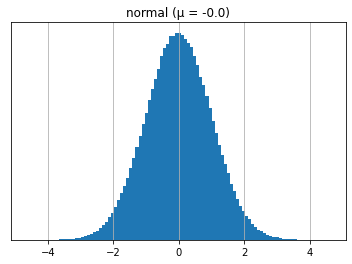

In [ ]:
# Normal distribution
repeated_hist(normal)

Why is this distribution called *normal*? The **Central Limit Theorem** says  that it is the ultimate limit of other distributions, as follows (informally):
- Gather *k* independent distributions. They need not be normal-shaped.
- Define a new distribution to be the result of sampling one number from each of the *k* independent distributions and adding them up.
- As long as *k* is not too small, and the component distributions are not super-pathological, then the new distribution will tend towards a normal distribution.

Here's a simple example: summing ten independent die rolls:

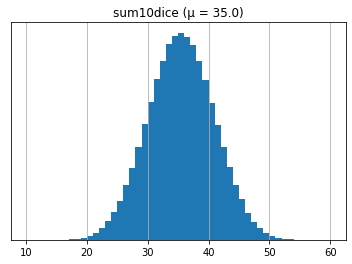

In [ ]:
def sum10dice(): return sum(random.randint(1, 6) for _ in range(10))

repeated_hist(sum10dice, bins=range(10, 61))

As another example, let's take just *k* = 5 component distributions representing the per-game scores of 5 basketball players, and then sum them together to form the new distribution, the team score. I'll be creative in defining the distributions for each player, but [historically accurate](https://www.basketball-reference.com/teams/GSW/2016.html) in the mean for each distribution.

In [ ]:
def SC(): return max(0, normal(12.1, 3) + 3 * triangular(1, 13, 4))                     # 30.1
def KT(): return max(0, triangular(8, 22, 15.3) + choice((0, 3 * triangular(1, 9, 4)))) # 22.1
def DG(): return max(0, vonmisesvariate(30, 2) * 3.08)                                  # 14.0
def HB(): return max(0, choice((normal(6.7, 1.5), normal(16.7, 2.5))))                  # 11.7
def BE(): return max(0, normal(17, 3) + uniform(0, 40))                                 # 37.0

team = (SC, KT, DG, HB, BE)

def Team(team=team): return sum(player() for player in team)

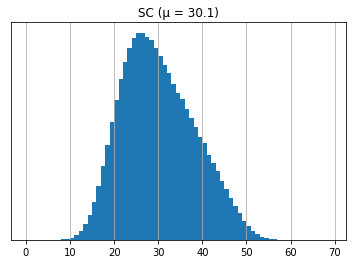

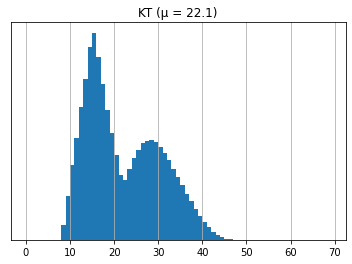

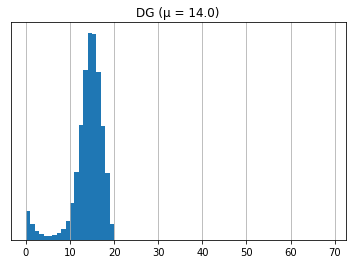

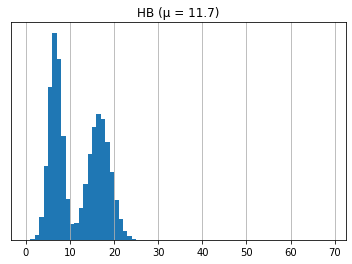

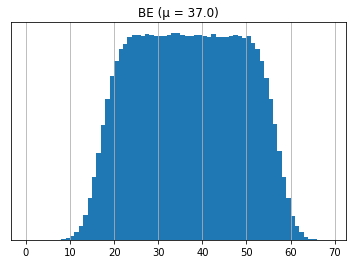

In [ ]:
for player in team: 
    repeated_hist(player, bins=range(70))

We can see that none of the players have a distribution that looks like a normal distribution: `SC` is skewed to one side (the mean is 5 points to the right of the peak); the three next players have bimodal distributions; and `BE` is too flat on top. 

Now we define the team score to be the sum of the *k* = 5 players, and display this new distribution:

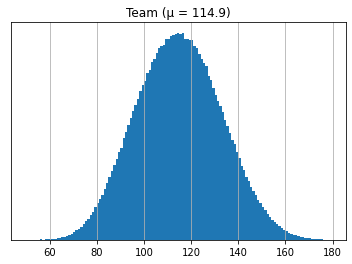

In [ ]:
repeated_hist(Team, bins=range(50, 180))

Sure enough, this looks very much like a normal distribution. The **Central Limit Theorem** appears to hold in this case. But I have to say: "Central Limit" is not a very evocative name, so I propose we re-name this as the **Strength in Numbers Theorem**, to indicate the fact that if you have a lot of numbers, you tend to get the expected result.

# Conclusion

We've had an interesting tour and met some giants of the field: Laplace, Bernoulli, Fermat, Pascal, Bayes, Newton, ... even Mr. Monopoly and The Count.

The conclusion is: be methodical in defining the sample space and the event(s) of interest, and be careful in counting the number of outcomes in the numerator and denominator. and you can't go wrong. Easy as 1-2-3. 

<hr>

# Appendix: Continuous Sample Spaces

Everything up to here has been about discrete, finite sample spaces, where we can *enumerate* all the possible outcomes. 

But a reader asked about *continuous* sample spaces, such as the space of real numbers. The principles are the same: probability is still the ratio of the favorable cases to all the cases, but now instead of *counting* cases, we have to (in general) compute integrals to compare the sizes of cases. 
Here we will cover a simple example, which we first solve approximately by simulation, and then exactly by calculation.

## The Hot New Game Show Problem: Simulation

Oliver Roeder posed [this problem](http://fivethirtyeight.com/features/can-you-win-this-hot-new-game-show/) in the 538 *Riddler* blog:

>Two players go on a hot new game show called *Higher Number Wins.* The two go into separate booths, and each presses a button, and a random number between zero and one appears on a screen. (At this point, neither knows the other’s number, but they do know the numbers are chosen from a standard uniform distribution.) They can choose to keep that first number, or to press the button again to discard the first number and get a second random number, which they must keep. Then, they come out of their booths and see the final number for each player on the wall. The lavish grand prize — a case full of gold bullion — is awarded to the player who kept the higher number. Which number is the optimal cutoff for players to discard their first number and choose another? Put another way, within which range should they choose to keep the first number, and within which range should they reject it and try their luck with a second number?

We'll use this notation:
- **A**, **B**: the two players.
- *A*, *B*: the cutoff values they choose: the lower bound of the range of first numbers they will accept.
- *a*, *b*: the actual random numbers that appear on the screen.

For example, if player **A** chooses a cutoff of *A* = 0.6, that means that **A** would accept any first number greater than 0.6, and reject any number below that cutoff. The question is: What cutoff, *A*, should player **A** choose to maximize the chance of winning, that is, maximize P(*a* > *b*)?

First, simulate the number that a player with a given cutoff gets (note that `random.random()` returns a float sampled uniformly from the interval [0..1]):

In [ ]:
number= random.random

def strategy(cutoff):
    "Play the game with given cutoff, returning the first or second random number."
    first = number()
    return first if first > cutoff else number()

In [ ]:
strategy(.5)

0.7567488540951384

Now compare the numbers returned with a cutoff of *A* versus a cutoff of *B*, and repeat for a large number of trials; this gives us an estimate of the probability that cutoff *A* is better than cutoff *B*:

In [ ]:
def Pwin(A, B, trials=20000):
    "The probability that cutoff A wins against cutoff B."
    return mean(strategy(A) > strategy(B) 
                for _ in range(trials))

In [ ]:
Pwin(0.6, 0.9)

0.5668

Now define a function, `top`, that considers a collection of possible cutoffs, estimate the probability for each cutoff playing against each other cutoff, and returns a list with the `N` top cutoffs (the ones that defeated the most number of opponent cutoffs), and the number of opponents they defeat: 

In [ ]:
def top(N, cutoffs):
    "Return the N best cutoffs and the number of opponent cutoffs they beat."
    winners = Counter(A if Pwin(A, B) > 0.5 else B
                      for (A, B) in itertools.combinations(cutoffs, 2))
    return winners.most_common(N)

In [ ]:
from numpy import arange

top(10, arange(0.5, 1.0, 0.01))

[(0.6100000000000001, 44),
 (0.60000000000000009, 43),
 (0.63000000000000012, 43),
 (0.55000000000000004, 42),
 (0.58000000000000007, 42),
 (0.56000000000000005, 42),
 (0.62000000000000011, 42),
 (0.64000000000000012, 41),
 (0.65000000000000013, 41),
 (0.57000000000000006, 40)]

We get a good idea of the top cutoffs, but they are close to each other, so we can't quite be sure which is best, only that the best is somewhere around 0.60. We could get a better estimate by increasing the number of trials, but that would consume more time.

## The Hot New Game Show Problem: Exact Calculation

More promising is the possibility of making `Pwin(A, B)` an exact calculation. But before we get to `Pwin(A, B)`, let's solve a simpler problem: assume that both players **A** and **B** have chosen a cutoff, and have each received a number above the cutoff. What is the probability that **A** gets the higher number? We'll call this `Phigher(A, B)`. We can think of this as a two-dimensional sample space of points in the (*a*, *b*) plane, where *a* ranges from the cutoff *A* to 1 and *b* ranges from the cutoff B to 1. Here is a diagram of that two-dimensional sample space, with the cutoffs *A*=0.5 and *B*=0.6:

<img src="http://norvig.com/ipython/probability2da.jpg" width=413>

The total area of the sample space is 0.5 &times; 0.4 = 0.20, and in general it is (1 - *A*) &middot; (1 - *B*). What about the favorable cases, where **A** beats **B**? That corresponds to the shaded triangle below:

<img src="http://norvig.com/ipython/probability2d.jpg" width=413>

The area of a triangle is 1/2 the base times the height, or in this case, 0.4<sup>2</sup> / 2 = 0.08, and in general, (1 - *B*)<sup>2</sup> / 2. So in general we have:

    Phigher(A, B) = favorable / total
    favorable     = ((1 - B) ** 2) / 2 
    total         = (1 - A) * (1 - B)
    Phigher(A, B) = (((1 - B) ** 2) / 2) / ((1 - A) * (1 - B))
    Phigher(A, B) = (1 - B) / (2 * (1 - A))
    
And in this specific case we have:

     A = 0.5; B = 0.6
     favorable         = 0.4 ** 2 / 2 = 0.08
     total             = 0.5 * 0.4    = 0.20
     Phigher(0.5, 0.6) = 0.08 / 0.20  = 0.4

But note that this only works when the cutoff *A* &le; *B*; when *A* > *B*, we need to reverse things. That gives us the code:

In [ ]:
def Phigher(A, B):
    "Probability that a sample from [A..1] is higher than one from [B..1]."
    if A <= B:
        return (1 - B) / (2 * (1 - A))
    else:
        return 1 - Phigher(B, A)

In [ ]:
Phigher(0.5, 0.6)

0.4

We're now ready to tackle the full game. There are four cases to consider, depending on whether **A** and **B** gets a first number that is above or below their cutoff choices:

| first *a* | first *b* | P(*a*, *b*) | P(A wins &vert; *a*, *b*) |  Comment |
|:-----:|:-----:| ----------- | ------------- | ------------ |
| *a* > *A* | *b* > *B* | (1 - *A*) &middot; (1 - *B*) | Phigher(*A*, *B*) | Both above cutoff; both keep first numbers |
| *a* < *A* | *b* < *B* | *A* &middot; *B* | Phigher(0, 0)  | Both below cutoff, both get new numbers from [0..1] |
| *a* > *A* | *b* < *B* | (1 - *A*) &middot;  *B* | Phigher(*A*, 0) | **A** keeps number; **B** gets new number from [0..1] |
| *a* < *A* | *b* > *B* | *A* &middot; (1 - *B*) | Phigher(0, *B*) | **A** gets new number from [0..1]; **B** keeps number |

For example, the first row of this table says that the event of both first numbers being above their respective cutoffs has probability (1 - *A*) &middot; (1 - *B*), and if this does occur, then the probability of **A** winning is Phigher(*A*, *B*).
We're ready to replace the old simulation-based `Pwin` with a new calculation-based version:

In [ ]:
def Pwin(A, B):
    "With what probability does cutoff A win against cutoff B?"
    return ((1-A) * (1-B) * Phigher(A, B)  # both above cutoff
            + A * B       * Phigher(0, 0)  # both below cutoff
            + (1-A) * B   * Phigher(A, 0)  # A above, B below
            + A * (1-B)   * Phigher(0, B)) # A below, B above

In [ ]:
Pwin(0.5, 0.6)

0.495

`Pwin` relies on a lot of algebra. Let's define a few tests to check for obvious errors:

In [ ]:
def test():
    assert Phigher(0.5, 0.5) == Phigher(0.75, 0.75) == Phigher(0, 0) == 0.5
    assert Pwin(0.5, 0.5) == Pwin(0.75, 0.75) == 0.5
    assert Phigher(.6, .5) == 0.6
    assert Phigher(.5, .6) == 0.4
    return 'ok'

test()

'ok'

Let's repeat the calculation with our new, exact `Pwin`:

In [ ]:
top(10, arange(0.5, 1.0, 0.01))

[(0.62000000000000011, 49),
 (0.6100000000000001, 48),
 (0.60000000000000009, 47),
 (0.59000000000000008, 46),
 (0.63000000000000012, 45),
 (0.58000000000000007, 44),
 (0.57000000000000006, 43),
 (0.64000000000000012, 42),
 (0.56000000000000005, 41),
 (0.55000000000000004, 40)]

It is good to see that the simulation and the exact calculation are in rough agreement; that gives me more confidence in both of them. We see here that 0.62 defeats all the other cutoffs, and 0.61 defeats all cutoffs except 0.62. The great thing about the exact calculation code is that it runs fast, regardless of how much accuracy we want. We can zero in on the range around 0.6:

In [ ]:
top(10, arange(0.5, 0.7, 0.001))

[(0.6180000000000001, 199),
 (0.6170000000000001, 198),
 (0.6160000000000001, 197),
 (0.61900000000000011, 196),
 (0.6150000000000001, 195),
 (0.6140000000000001, 194),
 (0.6130000000000001, 193),
 (0.62000000000000011, 192),
 (0.6120000000000001, 191),
 (0.6110000000000001, 190)]

This says 0.618 is best, better than 0.620. We can get even more accuracy:

In [ ]:
top(10, arange(0.617, 0.619, 0.000001))

[(0.61803400000002973, 2000),
 (0.6180330000000297, 1999),
 (0.61803200000002967, 1998),
 (0.61803500000002976, 1997),
 (0.61803100000002964, 1996),
 (0.61803000000002961, 1995),
 (0.61802900000002958, 1994),
 (0.61803600000002978, 1993),
 (0.61802800000002955, 1992),
 (0.61802700000002952, 1991)]

So 0.618034 is best. Does that number [look familiar](https://en.wikipedia.org/wiki/Golden_ratio)? Can we prove that it is what I think it is?

To understand the strategic possibilities, it is helpful to draw a 3D plot of `Pwin(A, B)` for values of *A* and *B* between 0 and 1:

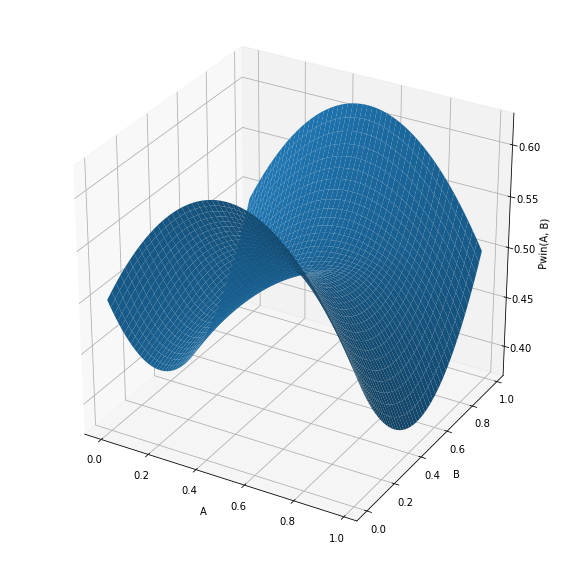

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

def map2(fn, A, B):
    "Map fn to corresponding elements of 2D arrays A and B."
    return [list(map(fn, Arow, Brow))
            for (Arow, Brow) in zip(A, B)]

cutoffs = arange(0.00, 1.00, 0.02)
A, B = np.meshgrid(cutoffs, cutoffs)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Pwin(A, B)')
ax.plot_surface(A, B, map2(Pwin, A, B));

What does this [Pringle of Probability](http://fivethirtyeight.com/features/should-you-shoot-free-throws-underhand/) show us? The highest win percentage for **A**, the peak of the surface, occurs when *A* is around 0.5 and *B* is 0 or 1. We can confirm that, finding the maximum `Pwin(A, B)` for many different cutoff values of `A` and `B`:

In [ ]:
cutoffs = (set(arange(0.00,    1.00,    0.01)) | 
           set(arange(0.500,   0.700,   0.001)) | 
           set(arange(0.61803, 0.61804, 0.000001)))

def Pwin_summary(A, B): return [Pwin(A, B), 'A:', A, 'B:', B]

In [ ]:
max(Pwin_summary(A, B) for A in cutoffs for B in cutoffs)

[0.625, 'A:', 0.5, 'B:', 0.0]

So **A** could win 62.5% of the time if only **B** would chose a cutoff of 0. But, unfortunately for **A**, a rational player **B** is not going to do that. We can ask what happens if the game is changed so that player **A** has to declare a cutoff first, and then player **B** gets to respond with a cutoff, with full knowledge of **A**'s choice. In other words, what cutoff should **A** choose to maximize `Pwin(A, B)`, given that **B** is going to take that knowledge and pick a cutoff that minimizes `Pwin(A, B)`? 

In [ ]:
max(min(Pwin_summary(A, B) for B in cutoffs)
    for A in cutoffs)

[0.5, 'A:', 0.61803400000000008, 'B:', 0.61803400000000008]

And what if we run it the other way around, where **B** chooses a cutoff first, and then **A** responds?

In [ ]:
min(max(Pwin_summary(A, B) for A in cutoffs)
    for B in cutoffs)

[0.5, 'A:', 0.61803400000000008, 'B:', 0.61803400000000008]

In both cases, the rational choice for both players in a cutoff of 0.618034, which corresponds to the  "saddle point" in the middle of the plot. This is a *stable equilibrium*; consider fixing *B* = 0.618034, and notice that if *A* changes to any other value, we slip off the saddle to the right or left, resulting in a worse win probability for **A**. Similarly, if we fix *A* = 0.618034, then if *B* changes to another value, we ride up the saddle to a higher win percentage for **A**, which is worse for **B**. So neither player will want to move from the saddle point.

The moral for continuous spaces is the same as for discrete spaces: be careful about defining your sample space; measure carefully, and let your code take care of the rest.

# Videos sobre probabilidad

https://m.youtube.com/watch?v=uzkc-qNVoOk

https://m.youtube.com/watch?v=OAzr89dHLRY


## Codigo Latex para formulas

**Prof. Notes**. 

A. Steps to create some basic plots:
- Import the libraries
- Create the function $f(x)$
- Create the domain $x \in [lowerbound,upperbound]$

B. What libraries are the best?:
- Use Numpy for mathematical functions. Trigonometric ones like $sin$ or $cos$ and $\pi$ are well defined. Numerical functions like absolute $|x|$ and exponential $e^x$ are useful.
- Use Matplotlib for plotting. Remember, "un bon croquis vaut mieux qu'un long discours[1]". The easiest way to use plot with a single frame is *plt.plot(a,b)* where you'll have values of $a$ in the x-axis, and values of $b$ in the y-axis.  
- If you need to show a table of your data, use Pandas. As long as you use single lists or numpy vectors, you'll be able to add them to a Pandas DataFrame. Remember, a list is a collection (ex. list_a = [1,2,3,4,5]) and a vector is a collection of “items” of the same type. The items can be indexed using for example N integers. NumPy provides them as an N-dimensional array type, the ndarray [2].

C. Mathematical notation: 

When communicating your findings, it is recommended to use mathematical notations for some explanation on your variables, shapes and trends. You'll find that Jupyter notebooks are able to render formulas and common mathematical symbols using Latex. LaTeX is widely used in academia for the communication and publication of scientific documents in many fields, including mathematics, computer science, engineering, physics, chemistry, economics, linguistics, quantitative psychology, philosophy, and political science. LaTeX uses the TeX typesetting program for formatting its output, and is itself written in the TeX macro language.

Some basic hints for writting formulas in Jupyter/Colab:
- Start and end with the \$ sign
- Example 1: x + 2 will be rendered as $x + 2$
- Example 2: Exponentiation uses the ^ (hat) symbol so x^2 will be rendered as $x^2$
- Example 3: Isolate values using braces {} and use special symbols using backslah \\. Some common special symbols are \\sum, \\int, \\Sigma, \\rho, \\alpha, \\beta will be rendered as $\sum$, $\int$, $\rho$, $α$ and $\beta$
- Example 4: Fractions must be written using frac, for example \frac{x}{y} will be rendered as $\frac{x}{y}$
- Example 5: Subindexes use an underline such as x_1 will be rendered as $x_1$
- Example 6: Matrices are a little complex to represent. Youl need to start (and end) with \$ dollar sign, then open bracket, represent the matrix dimension (with subindexes) and the matrix elements inside a \\begin and \\end clause 

** Common derivatives:  **  

$f(x) = sin(x)$ then the derivative is $ f'(x) = cos(x) $  

$f(x) = cos(x)$ then the derivative is $ f'(x) = -sin(x) $  

$f(x) = a^x $ then the derivative is $ f'(x) = ln(a) a^x  $  

$f(x) = e^x$ then the derivative is $ f'(x) = e^x $  

$f(x) = a^{g(x)}$ then the derivative is $ f'(x) = ln(a) a^{g(x)} g'(x) $  

$f(x) = e^{g(x)}$ then the derivative is $ f'(x) = e^{g(x)} g'(x) $ 

$f(x) = log_a(x)$ then the derivative is $ f'(x) = \frac{1}{ln_a(x)} $ 

$f(x) = ln(x)$ then the derivative is $ f'(x) = \frac{1}{x} $ 

$f(x) = log_a(g(x))$ then the derivative is $ f'(x) = \frac{g'(x)}{ln_a(g(x))} $ 

$f(x) = ln(g(x))$ then the derivative is $ f'(x) = \frac{g'(x)}{g(x)} $ 

**Common rules ** 

Constant rule = $f(x) = c$ -> $ f'(x) = 0 $

Constant multiple rule = $ g(x) = c * f(x) $ -> g'(x) = cf'(x)

Power rule = $f(x) = x^n$ -> $f'(x) = nx^{n-1}$

Sum rule = $ h(x) = f(x) + g(x)$ -> $h'(x) = f'(x) + g'(x)$

Product rule = $h(x) = f(x) * g(x) $ -> $g'(x) = f'(x)*g(x) + f(x) * g'(x)$